In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [ ]:
url='/content/drive/My Drive/Hr/HR_comma_sep.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

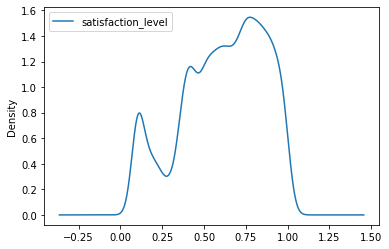

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['satisfaction_level'].plot(kind='kde',ax=ax)
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

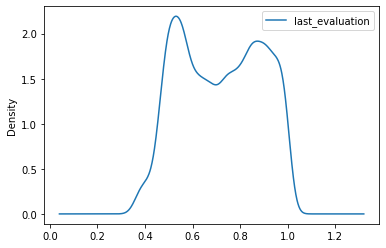

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['last_evaluation'].plot(kind='kde',ax=ax)
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


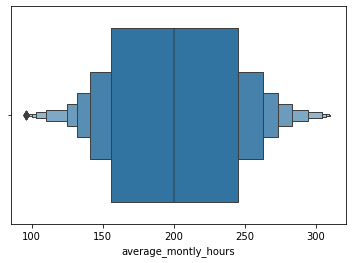

In [ ]:
sns.boxenplot('average_montly_hours',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


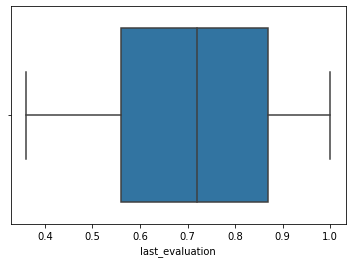

In [ ]:
sns.boxplot('last_evaluation',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


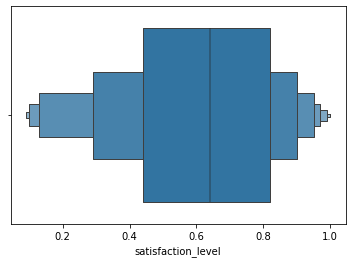

In [ ]:
sns.boxenplot('satisfaction_level',data=df)

In [ ]:
# onehot encoding
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

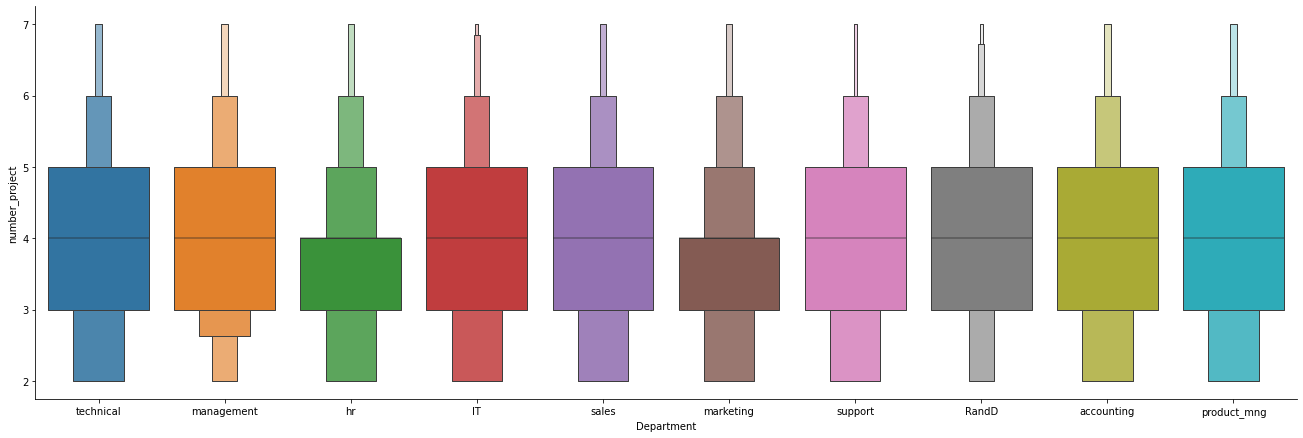

In [ ]:
sns.catplot(y='number_project',x='Department',data=df.sort_values('number_project',ascending=False),kind='boxen',height=6,aspect=3)

In [ ]:
Department=df[['Department']]
Department=pd.get_dummies(Department,drop_first=True)
Department.head()

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


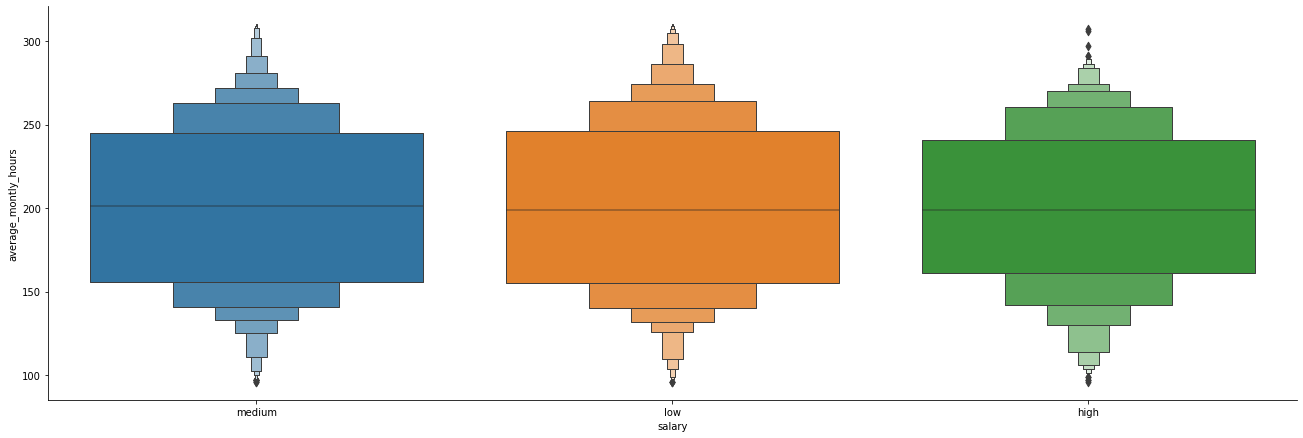

In [ ]:
sns.catplot(y='average_montly_hours',x='salary',data=df.sort_values('average_montly_hours',ascending=False),kind='boxen',height=6,aspect=3)

In [ ]:
salary=df[['salary']]
salary=pd.get_dummies(salary,drop_first=True)

In [ ]:
salary.head()

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
df=pd.concat([df,Department,salary],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
df.drop(['Department','salary'],inplace=True,axis=1)

In [ ]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
df.shape

(14999, 19)

In [ ]:
## Feature selection
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
X=df.loc[:,['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium']]

In [ ]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
y=df.iloc[:,6]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

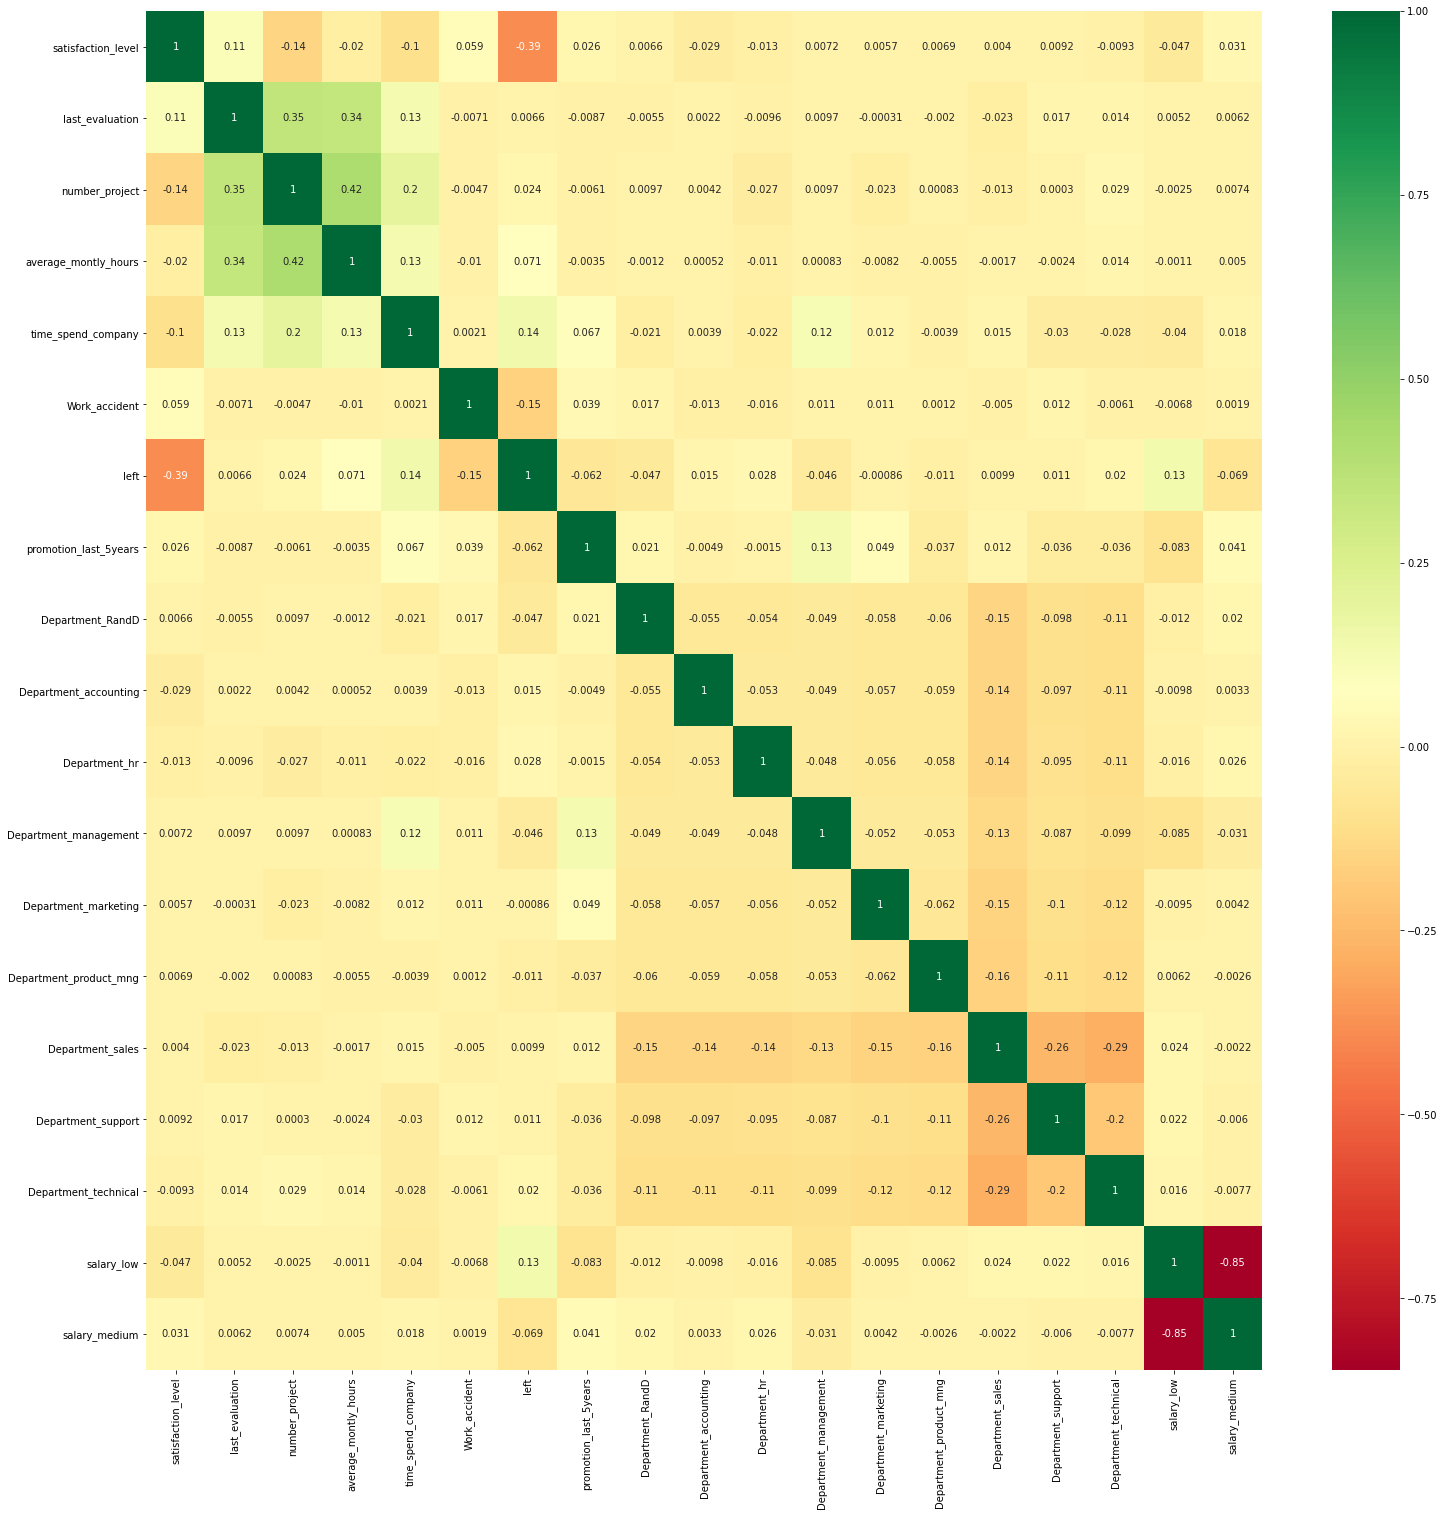

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
# spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11999, 18)
(11999,)
(3000, 18)
(3000,)


In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
# importing the keras libraries and package
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
# initialising the ANN
model=Sequential()

In [ ]:
len(X.columns)

18

In [ ]:
# Adding the input layer and the first hidden layer
model.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=18))

In [ ]:
# Adding the second hidden layer
model.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [ ]:
# Adding the output layers
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
# compile the ANN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
# Fitting the ANN to the tarining set
model_histroy=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=150)

Epoch 1/150
804/804 [==============================] - 2s 3ms/step - loss: 0.5267 - accuracy: 0.7431 - val_loss: 0.4301 - val_accuracy: 0.7778
Epoch 2/150
804/804 [==============================] - 2s 3ms/step - loss: 0.3805 - accuracy: 0.8158 - val_loss: 0.3354 - val_accuracy: 0.8472
Epoch 3/150
804/804 [==============================] - 2s 3ms/step - loss: 0.2969 - accuracy: 0.8638 - val_loss: 0.2646 - val_accuracy: 0.8922
Epoch 4/150
804/804 [==============================] - 2s 3ms/step - loss: 0.2433 - accuracy: 0.9070 - val_loss: 0.2226 - val_accuracy: 0.9205
Epoch 5/150
804/804 [==============================] - 2s 3ms/step - loss: 0.2130 - accuracy: 0.9256 - val_loss: 0.2031 - val_accuracy: 0.9341
Epoch 6/150
804/804 [==============================] - 2s 3ms/step - loss: 0.1971 - accuracy: 0.9352 - val_loss: 0.1893 - val_accuracy: 0.9394
Epoch 7/150
804/804 [==============================] - 2s 3ms/step - loss: 0.1871 - accuracy: 0.9407 - val_loss: 0.1821 - val_accuracy: 0.9409

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


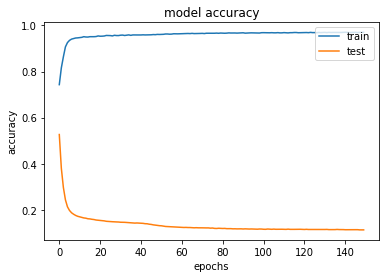

In [ ]:
## List all data in history
print(model_histroy.history.keys())
plt.plot(model_histroy.history['accuracy'])
plt.plot(model_histroy.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper right')
plt.show()

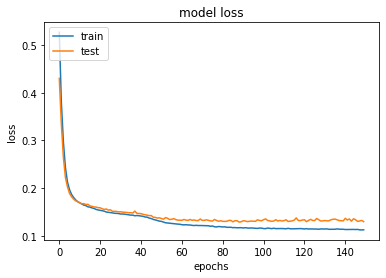

In [ ]:
# summarize history for loss
plt.plot(model_histroy.history['loss'])
plt.plot(model_histroy.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')

In [ ]:
## part 3 -Making the predictions and evaluating the model
# predicting the Test set results
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

In [ ]:

# making the confusion matrix

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)

In [ ]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [ ]:
score

0.9673333333333334

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 114       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
